# Solution of Machine Learning Contest-2020

*Solution for Machine Learning Contest-2020*

*Source of Dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv*

## Importing Libraries

In [438]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
from matplotlib import pyplot as plt
import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Importing and Processing Data

### Importing and Viewing Data

*Importing Data from csv file*

In [0]:
df = pd.read_csv('LinearReg.csv',sep=';')

*Printing Data and its Statistics*

In [440]:
df = df.reindex(np.random.permutation(df.index))			#Shuffle
print (df)
print (df.describe())					#Gives statitics of the data

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
1228            5.1             0.420         0.00  ...       0.73     13.6        7
286            12.0             0.450         0.55  ...       0.76     10.3        6
130             8.0             0.745         0.56  ...       0.66      9.4        5
1040            7.4             0.965         0.00  ...       0.67     10.2        5
223             8.6             0.645         0.25  ...       0.60     10.0        6
...             ...               ...          ...  ...        ...      ...      ...
1596            6.3             0.510         0.13  ...       0.75     11.0        6
768             7.1             0.590         0.02  ...       0.53      9.7        6
258             7.7             0.410         0.76  ...       1.26      9.4        5
942            10.1             0.430         0.40  ...       0.64     10.0        7
1526            6.8             0.470         0.08  ...       0.6

In [441]:
X = df.loc[:, df.columns != "quality"] # Defining Input and Output variables
y = df["quality"]
print (X.columns.values)
print (y)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
1228    7
286     6
130     5
1040    5
223     6
       ..
1596    6
768     6
258     5
942     7
1526    6
Name: quality, Length: 1599, dtype: int64


In [0]:
#converting pandas Dataframe to Numpy Arrays
X = X.to_numpy()
y = y.to_numpy()

### Preprocessing Data

*Preprocessing Data*

#### Feature Normalisation
$$X=\frac{X-\mu}{\sigma}$$
First, for each feature dimension, compute the mean of the feature
and subtract it from the dataset, storing the mean value in mu ($\mu$). 
Next, compute the  standard deviation of each feature and divide
each feature by it's standard deviation, storing the standard deviation 
in sigma ($\sigma$).

In [0]:
def Feature_Normalize(X):
    """
    Normalizes the features in X. returns a normalized version of X.
    """
    mu = np.mean(X, axis = 0)       #computing mean
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma       #Feature Normalisation
    return X_norm, mu, sigma

### Splitting the Data for Training and Testing

*Splitting Data to Train and Test sets to train and evaluate the Model*

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)#Train-Test Split

In [0]:
X_train= Feature_Normalize(X_train)[0]
X_test = Feature_Normalize(X_test)[0]
X_train = np.c_[np.ones(X_train.shape[0]), X_train] #Add a column of ones
X_test = np.c_[np.ones(X_test.shape[0]), X_test] 

In [446]:
print ("Shape of Training Set is",X_train.shape)
print ("Shape of Test Set is",X_test.shape)
print ("Shape of Training Set is",y_train.shape)
print ("Shape of Test Set is",y_test.shape)

Shape of Training Set is (1279, 12)
Shape of Test Set is (320, 12)
Shape of Training Set is (1279,)
Shape of Test Set is (320,)


## Objective, Cost function and Gradient Descent 

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 +\frac{\lambda}{2m}\sum_{j=1}^n {\theta_j}^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model$$ h_\theta(x) = \theta^Tx = \sum_{i=0}^n \theta_ix_i$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \frac{\partial J(\theta)}{\partial \theta_j} \quad \forall j>=1  \qquad \text{simultaneously update } \theta_j \text{ for all } j$$
where, $$\frac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} + \frac{\lambda}{m}\theta_j$$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.

We are ignoring the Regularisation term in this approach.

## Training and Validating the Model

*Compute Cost function*

In [0]:
def CostFunction(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m = y.shape[0] # number of training examples
    J = 0
    h = X.dot(theta.T)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))#definition of cost function
    return J

*Gradient Descent*

In [0]:
def GradientDescent(X, y, theta, lr):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    theta = theta - (lr / m) * (np.dot(X, theta) - y).dot(X)#Gradient descent algorithm
    return theta

*Function to Calculate Validation Loss*

In [0]:
def Validation_Loss_Function(y_pred,y):
    """
    Function to calculate Validation Loss
    """
    m = y.shape[0]
    loss = np.square(y_pred-y)/(m)
    loss = np.sum(loss)
    loss = np.sqrt(loss)
    
    return loss   
    

### Training the Model

In [0]:
def Training_and_Validation(X_train,y_train,X_test,y_test,lr=0.3,epochs=10):
    """
    Training Linear Regression Model
    """
    s = X_train.shape[1]
    theta = np.zeros(s)
    Training_Loss = []
    Validation_Loss = []
    for i in range(epochs):
        theta = GradientDescent(X_train, y_train, theta, lr)
        Training_Loss.append(CostFunction(X_train,y_train,theta))
        y_pred = np.dot(X_test, theta)
        Validation_Loss.append(Validation_Loss_Function(y_pred,y_test))
        if (i%50 == 0):
            print ("Epoch : {}  |  Training Loss : {}  |  Validation Loss : {}".format(i, round(Training_Loss[i],6), round(Validation_Loss[i],5)))
    plt.plot(Training_Loss,'r')
    plt.plot(Validation_Loss,'y')
    plt.show()
      
    print ("Final Training Loss is equal to ",Training_Loss[-1])
    print ("Final Validation Loss is equal to ",Validation_Loss[-1])
    
    return theta  
    

Epoch : 0  |  Training Loss : 8.023372  |  Validation Loss : 4.00261


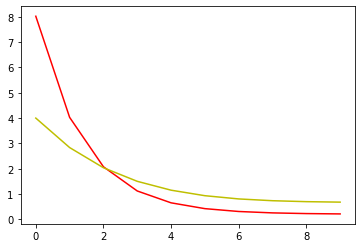

Final Training Loss is equal to  0.21915549604565593
Final Validation Loss is equal to  0.6841645056031475
Total time taken for training is: 0.23940110206604004 sec
[ 5.47797916  0.0542222  -0.18687125  0.02988732  0.02564634 -0.08655637
  0.0214673  -0.09390555 -0.07598728 -0.01446124  0.15006749  0.25710589]


In [454]:
start= time.time()
theta = Training_and_Validation(X_train,y_train,X_test,y_test)
end= time.time()
print ('Total time taken for training is:',end-start,'sec')
print(theta)

In [0]:
def Normalised_eqns(X,y):
    # Computes the closed-form solution to linear regression using the normal equations.
    theta = np.zeros(X_train.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta
theta_normal= Normalised_eqns(X_train,y_train)
print("Theta computed by Normal Eqns is :" , theta_normal)

In [0]:
X_array = [1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]
X_array = np.asarray(X_array)
X_array[1:11] = (X_array[1:11] - np.mean(X_array[1:11])) /(np.std(X_array[1:11]))
quality_normalised_eqns = np.dot(X_array,Normalised_eqns(X_train,y_train) ) 
quality_by_gradient_descent=np.dot(X_array,theta)
print('quality by normalised_eqns :', quality_normalised_eqns)
print('quality by Gradient descent:', quality_by_gradient_descent)
closeness=np.allclose(theta_normal,theta,rtol=1e-2, atol=1e-2)
print(closeness)